In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 14, 14, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 14, 14, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 14, 14, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 14, 14, 728)  0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv3 (SeparableConv2 (None, 14, 14, 728)  536536      block5_sepconv3_act[0][0]  

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 16s 8s/step - loss: 4.0119 - accuracy: 0.4219 - val_loss: 4.4423 - val_accuracy: 0.3621
Epoch 2/50
2/2 [==============================] - 12s 6s/step - loss: 2.5715 - accuracy: 0.5938 - val_loss: 4.3563 - val_accuracy: 0.6379
Epoch 3/50
2/2 [==============================] - 11s 6s/step - loss: 2.4978 - accuracy: 0.6406 - val_loss: 2.2815 - val_accuracy: 0.7069
Epoch 4/50
2/2 [==============================] - 14s 7s/step - loss: 1.8675 - accuracy: 0.7344 - val_loss: 1.4494 - val_accuracy: 0.7586
Epoch 5/50
2/2 [==============================] - 13s 6s/step - loss: 0.5681 - accuracy: 0.8594 - val_loss: 3.9176 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 13s 7s/step - loss: 1.5978 - accuracy: 0.6875 - val_loss: 1.7397 - val_accuracy: 0.7931
Epoch 7/50
2/2 [==============================] - 14s 7s/step - loss: 0.3327 - accuracy: 0.8750 

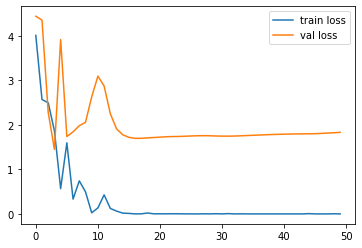

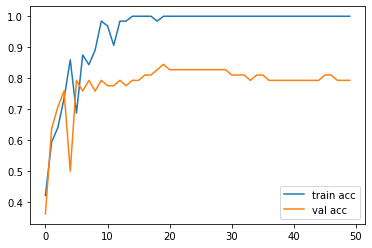

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_xception.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[1.5960333e-23, 1.0000000e+00, 3.8373471e-20],
       [9.9889487e-01, 5.9056928e-09, 1.1051375e-03],
       [8.4621861e-06, 9.9966061e-01, 3.3091125e-04],
       [2.5208341e-25, 1.0000000e+00, 5.7500692e-27],
       [8.0774981e-01, 1.9186059e-01, 3.8958198e-04],
       [2.5532501e-11, 9.9970108e-01, 2.9886147e-04],
       [2.2994388e-10, 3.6860447e-15, 1.0000000e+00],
       [9.9884075e-01, 3.0858561e-07, 1.1589412e-03],
       [9.9021101e-01, 5.5726626e-16, 9.7890478e-03],
       [2.0279258e-03, 9.9790883e-01, 6.3268300e-05],
       [1.3180999e-06, 4.7447229e-21, 9.9999869e-01],
       [1.4678387e-11, 5.2348224e-18, 1.0000000e+00],
       [2.3377007e-03, 9.1588292e-03, 9.8850340e-01],
       [1.1119094e-10, 9.9999893e-01, 1.1089581e-06],
       [2.9528897e-12, 1.0000000e+00, 2.5873607e-14],
       [6.6596387e-14, 1.0000000e+00, 6.7853816e-18],
       [3.0243275e-10, 9.7434765e-01, 2.5652358e-02],
       [3.7405457e-10, 9.9999988e-01, 7.4959722e-08],
       [6.2392930e-05, 9.843

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [20]:
y_pred

array([1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_xception.h5')

In [25]:
img=image.load_img('Datasets/Test/mercedes/29.jpg',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]]

In [26]:
x.shape

(224, 224, 3)

In [28]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[5.4999160e-26, 9.9999976e-01, 2.1107203e-07]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

array([ True])